# Class 10 - solutions


## Contents


1. [Quantum Fourier Transform](#qft)
2. [Quantum Phase Estimation](#qpe)



**Module Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram

#IBMQ.load_account()

import math
from math import pi


## 1. Quantum Fourier Transform<a id='qft'></a>

&nbsp;

The quantum Fourier transform is analogue to the Discrete Fourier Transform (DFT). Similarly to the classical case, it is a very useful mathematical tool, and a building block in many quantum algorithms, such as quantum phase estimation, computing the discrete logarithm, and Shor's algorithm for factoring.

&nbsp;

### (Classical) Fourier Transform

In modern science and engineering, the Fourier transform is essential for signal processing and communications.

The FT allows us to extract the underlying periodic behaviour of a function, by decomposing it into its constituent frequencies.

&nbsp;

<div class="alert alert-block alert-info">

**Example: Fourier transform for signal processing**

&nbsp;

<img src="https://terpconnect.umd.edu/~toh/spectrum/iFilterAnimation.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

<sup>**a)** Take a sinusoidal signal with high frequency noise; **b)** Apply the Fourier transform, getting a frequency spectrum; **c)** Apply the inverse Fourier transform to give a clean set of data.</sup>

</div>

&nbsp;

### Discrete Fourier Transform

The DFT is a version of the Fourier transform that works on discrete data sets.

The discrete Fourier transform, $\tilde{f}$ of a discrete function, $f = f_1 , \cdots, f_N$ is given by

$$ \tilde{f}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} f_j$$

The inverse Fourier transform is expressed as

$$ f_j \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{-2\pi ijk/N} \tilde{f}_k$$

With $f_j$ and $\tilde{f}_k$ being complex numbers, and indices $j, k \in \{0, 1, \cdots, N-1\}$

&nbsp;
    

### Quantum Fourier tranform

Qubit states are represented by vectors of complex numbers, so it makes sense that the DFT can be applied to them.

Given a state vector:

$$ | \psi \rangle = \sum^{N-1}_{j=0} a_j |j\rangle = \begin{pmatrix}
a_0\\ 
\vdots\\ 
a_{N-1}
\end{pmatrix}$$

The DFT (which we will now call the quantum Fourier transform, or QFT) can be computed over the _amplitudes_ of the quantum state

$$ \sum_j \alpha_j |j\rangle \rightarrow \sum_k \tilde{\alpha}_k |k \rangle$$ where:

$$\tilde{\alpha}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} \alpha_k$$

&nbsp;

We observe that the amplitudes $\tilde{\alpha}_k$ are linear in the original $\alpha_j$. So there is a linear operator $\hat{F}$ which implements the transform.

We can write the matrix $\hat{F}$ in outer product notation:

&nbsp;

$$\hat{F} = \sum_{j,k=0}^{N-1} \frac{e^{2\pi ijk/N}}{\sqrt{N}} |k \rangle \langle j |$$

&nbsp;

The Fourier transform lets us define a new basis $|\hat{x}\rangle = \hat{F}|x\rangle$, where $\{ |x\rangle\}$ is the usual computational basis - every vector $|\hat{x}\rangle$ is an equally weighted superposition of all the computational basis states.

&nbsp;

<div class="alert alert-block alert-info">
    
**Position and Momentum**: 

&nbsp;

* From earlier classes, recall the change of basis for a single-qubit state. What operation may be performed to change it between the computational and superposition basis?

&nbsp;

* The Hadamard transform also turns computational basis states into equally weighted superpositions of all states. But it leaves all amplitudes real, while the amplitudes of $| \tilde{x}\rangle$ are complex. And it is its own inverse, while $\hat{F} \neq \hat{F}^\dagger$

&nbsp;

* In physics, the relationship of this basis to the computational basis is analogous to that between the _momentum_ and _position_ bases of a particle.

    
</div>

### QFT in the quantum circuit model of computation

&nbsp;

For the case of $n$ qubits, the vector describing a quantum state has dimension $N=2^n$. Since the QFT is an unitary operator, it can be implemented in a quantum circuit. Although there is no guarantee that such a circuit would be efficient (i.e. would not scale exponentially with the number of qubits), an efficient circuit _does_ exist.

&nbsp;

The key is to notice that the states $| \hat{j} \rangle$ can be written in a product form:

* Let the binary expression for $j$ be $j_1 j_2 \cdots j_n$, where:

$$ j = j_1 2^{n-1} \, +\, j_2 2^{n-2} \,+\, \cdots \,+\, j_n$$

* Admit the following notation for binary fractions:

$$ 0.j_1 j_2 \cdots j_n = j_1 /2 + j_2 /4 + \cdots + j_n /2^n$$

* Then the state $|\hat{j} \rangle$ can be written as:

$$ |\hat{j} \rangle  = \frac{1}{2^n/2} (|0\rangle + e^{2\pi i 0.j_n }| 1\rangle) \, \otimes \, (|0\rangle + e^{2\pi i 0.j_{n-1}j_n }| 1\rangle) \, \otimes \, \cdots \, \otimes \, (|0\rangle + e^{2\pi i 0.j_1j_2\cdots j_n }| 1\rangle)$$

&nbsp;

A unitary that performs the transformation

$$ |0\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle) \; ;\; |1\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle - e^{i\theta}|1\rangle)$$

may be decomposed into an Hadamard gate followed by a $Z$-rotation by $\theta$.

**However**, in the expression above, the rotation depends on the values of other bits. We can expect to build the QFT out of Hadamards and controlled-phase rotation gates.

&nbsp;

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Q_fourier_nqubits.png/1920px-Q_fourier_nqubits.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="700 px" align="center">

&nbsp;



<div class="alert alert-block alert-danger">

**Attention**

* In the figure above, notice the order of the input qubits (in comparison with Qiskit's circuit drawer);

* Notice how after the QFT, the qubits of the transformed state are in reverse order. What can be done to correct this?

</div>

&nbsp;

<div class="alert alert-block alert-info">
    
**Controlled phase rotation in Qiskit**

In Qiskit, the phase rotation gate, $u1(\lambda)$, is defined as:

$$u1(\lambda) = \begin{pmatrix} 1 & 0\\ 0 & e^{i\lambda} \end{pmatrix}$$

Admit $\lambda = 2\pi/2^k$ so that we can define a rotation operator:

$$R_k = \begin{pmatrix} 1 & 0\\ 0 & e^{2\pi i /2^k} \end{pmatrix}$$

The controlled-$R_k$ gate performs this rotation only if a control qubit is $|1\rangle$ rather than $|0\rangle$:

$$CR_k = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & e^{2\pi i /2^k} \end{pmatrix}$$


&nbsp;

A controlled-$u1$ gate may be implemented in Qiskit with the instruction `cp(theta, ctrl, trg)`.
</div>

In [2]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)
    
    return result_counts

<div class="alert alert-block alert-warning">

**Exercise - implementing the QFT**

&nbsp;

1. Implement a function `qftransform (circuit, qr, swap=True)` to perform the QFT over a register `qr`. The function should be able to ignore the swapping operations at the end when called with `swap=False`.

&nbsp;

2. How many controlled-$R_k$ gates are performed as a function of qubit number $n$? Does the circuit scale efficiently?

</div>

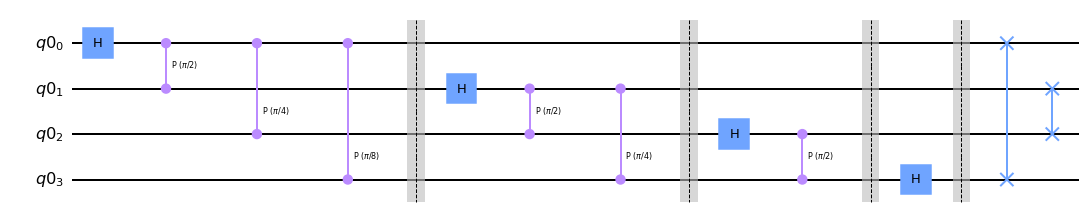

In [3]:
def qftransform(circuit, qr, swap=True):
    N=qr.__len__()
    
    for i in range(N):
        circuit.h(qr[i])
        for j in range(i+1,N):
            circuit.cp(2*pi/2**(j-i+1),qr[j],qr[i])
        circuit.barrier()
            
    if swap==True:
        for i in range(N//2):
            circuit.swap(qr[i], qr[N-i-1])

            
qr=QuantumRegister(4)
qc=QuantumCircuit(qr)

qftransform(qc, qr)

qc.draw(output='mpl', scale=1)

## 2. Quantum Phase Estimation<a id='qpe'></a>

&nbsp;

The phase estimation algorithm is a solution to a rather specific problem. However, similarly to the QFT and Grover's search algorithm, it turns out to be useful as a building block to several other algorithms to solve more general and important problems.

Suppose we have a unitary operator $\hat{U}$ operating on $n$-qubits, with a known eigenstate$^1$ $| \psi \rangle$ and an associated unknown eigenvalue $e^{i \theta{\psi}}$. We want to find the eigenvalue / phase, which means finding phase $\theta{\psi}$ with $m$-bits of precision.


 $$U |u \rangle = e^{i \theta_{\psi}}|u \rangle$$


We might try to prepare $n$ qubits in the state $|\theta{\psi} \rangle$ and carry out the unitary transformation $\hat{U}$ on them:


<img src="https://i.stack.imgur.com/9AFj7.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="100 px" align="center"> 


$^1$: An eigenstate is a quantum mechanical state whose wave function is an eigenvector that corresponds to a physical quantity.

<div class="alert alert-block alert-info">
    
**Question**: is there a measurement on the bits which will give us information about the phase $\phi$?

The answer is **no**: $\hat{U}$ just produces an overall phase on the state, with no observable consequences.

</div>

&nbsp;

Before we look into a more sophisticated approach to the problem, it's important to understand **phase kickback**.

### Phase kickback

&nbsp;

A key part of understanding the phase kickback is that $|\psi\rangle$ is an eigenvector of the operator $U$ with an eigenvalue of $e^{2\pi i \phi}$. In other words, $U|\psi\rangle = e^{2\pi i \phi}|\psi\rangle$, where $\phi$ is the phase that we are interested in 'kicking back'. A small example:

<img src="https://miro.medium.com/max/3600/1*DudEik8tsL5rl1aq-DUh-A.jpeg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="center"> 

&nbsp;

The system's state starts simply $|0\rangle|\psi\rangle$. 

&nbsp;

**After the first Hadamard**, the Hadamard operator has converted $|0\rangle$ into $H|0\rangle = |+\rangle = \frac{|0\rangle+|1\rangle}{\sqrt{2}} $. Thus, at point B, the whole system is in the state

$$\frac{|0\rangle+|1\rangle}{\sqrt{2}}|\psi\rangle = \frac{|0\rangle|\psi\rangle+|1\rangle|\psi\rangle}{\sqrt{2}}$$

&nbsp;

**After the CU** , the system is in the state 

&nbsp;

$$\frac{|0\rangle|\psi\rangle+|1\rangle U|\psi\rangle}{\sqrt{2}} = \frac{|0\rangle+e^{i \theta_{\psi}}|1\rangle}{\sqrt{2}}|\psi\rangle$$

&nbsp;

Note how the state $|\psi\rangle$ remains unchanged. This happens because applying $\hat{U}$ to $|\psi \rangle$ results in a "multiple" $e^{ i \theta{\psi}}$ of $|\psi \rangle$, which can be factored out. **This is only possible since we admit that $|\psi\rangle$ is an eigenstate of $\hat{U}$**.

&nbsp;

Now, let's consider higher powers of $U$, e.g. $U^2$. 

In this case, $|\psi\rangle$ is still an eigenvector of $U^2$.

More generally, $U^x |\psi\rangle = e^{x i \theta{\psi}}|\psi\rangle$ . 

In other words, **an eigenvector of $U$ is also an eigenvector of $U^x$; just with an eigenvalue that is raised to the power $x$**.

Thus, for a general $U^{2^k}$, after the CU, the system would be in the state

$$\frac{|0\rangle|\psi\rangle+|1\rangle U^{2^k}|\psi\rangle}{\sqrt{2}} = \frac{|0\rangle+e^{i 2^k \theta{\psi}}|1\rangle}{\sqrt{2}}|\psi\rangle$$

### Phase estimation algorithm

&nbsp;

The first part of the phase estimation algorithm consists in a paralell application of the phase kickback technique detailed above, to successive powers of $U$:

&nbsp;

<img src="https://qiskit.org/textbook/ch-algorithms/images/qpe_tex_qz.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center"> 

&nbsp;

The complete phase estimation procedure is as follows:

1. Prepare the $t$-bit control register in state $|0 \rangle$, and the target register in state $|u\rangle$ (eigenstate of $U$);

2. Perform Hadamards on the control bits.

3. Apply a controlled-$\hat{U}^{2^j}$, from the $j$th control bit onto the n target bits for each of the control q-bits in succession.

4. Perform an **inverse** Fourier transform on the $t$ control bits and measure them in the computational basis. The measured bit values $\phi_1, \cdots, \phi_n$ give an estimate of the phase $\phi \approx 0.\phi_1 \cdots \phi_n$, or $\phi \approx \frac{\phi_1}{2}+ \cdots + \frac{\phi_n}{2^n}$.

<div class="alert alert-block alert-warning">

**Exercise 1 - Estimate the Phase of T of $$**

&nbsp;

1. Implement the phase estimation algorithm to estimate, **to 3 bits of precision**, the the phase of $T |1\rangle = e^{\frac{i \pi}{4}}|1\rangle$

Since we are looking for $\theta$ in $T |1\rangle = e^{2 i \pi \theta} |1\rangle$ we expect to find $\theta = \frac{1}{8}$

3. What is the result for eigenstate $|0 \rangle$?

&nbsp;

</div>

In [4]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

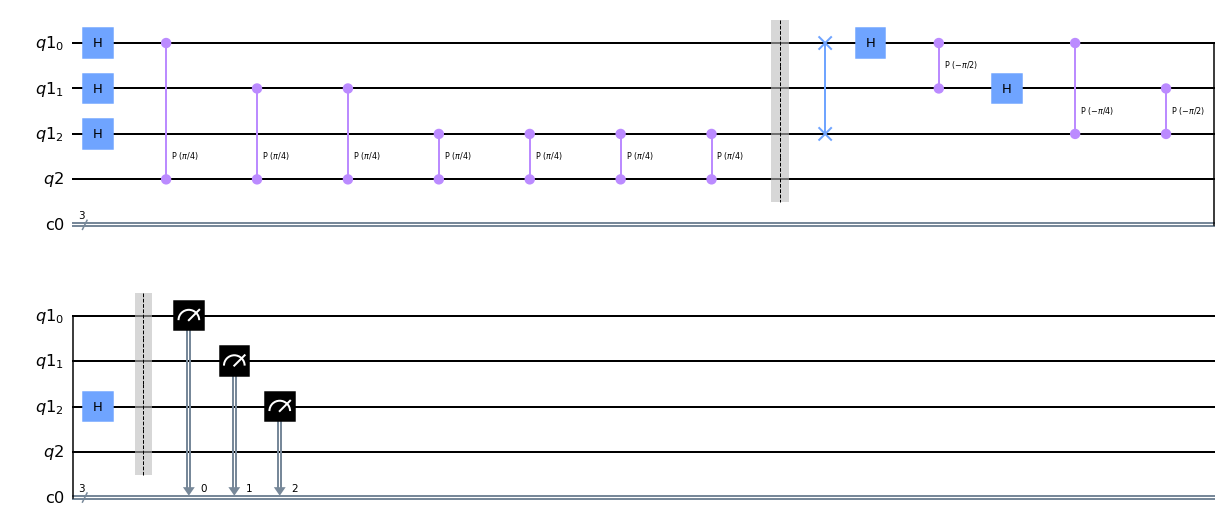

In [5]:
n=3
qctrl = QuantumRegister(n)
qtrg= QuantumRegister(1)
cr = ClassicalRegister(n)


qc = QuantumCircuit(qctrl, qtrg, cr)

qc.h(qctrl)
#qc.x(qtrg)

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qc.cp(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
# OU
#qc.crz(2*pi/4, qctrl[1], qtrg[0])
#qc.crz(2*pi/4, qctrl[1], qtrg[0])
#qc.crz(2*pi/4, qctrl[1], qtrg[0])

qr_be = []
for i in range(n):
    qr_be.append(qctrl[n-i-1])

qc.barrier()
# Apply inverse QFT
qft_dagger(qc, 3)
# Measure
qc.barrier()
for m in range(3):
    qc.measure(m,m)



qc.draw(output='mpl')

simulation: 

 {'000': 1024}


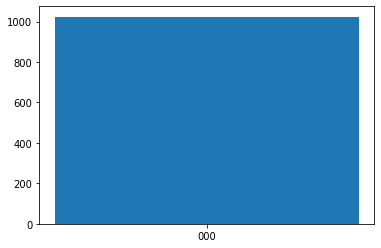

In [6]:
a = execute_locally(qc)

In [7]:
def binaryToDecimal(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return(decimal)    

In [8]:
key = list(a.keys())[0]
r = binaryToDecimal(int(key))
theta= r/(2**n)

print(theta)

0.0


<div class="alert alert-block alert-warning">

**Exercise 2 - Implementing the phase estimation algorithm**

&nbsp;

Implement a function `phase_est(qc, qr_ctrl, qr_trg, theta, phi, lambda, n)` to create a phase estimation circuit in `qc` with `n` bits of precision, for a general single-qubit operation

&nbsp;

$$
u_3(\theta, \phi, \lambda) = 
	    \begin{pmatrix}
        \cos{(\theta/2)} & -e^{i\lambda}\sin{(\theta/2)}\\ 
        e^{i\phi}\sin{(\theta/2)} & e^{i(\lambda + \phi)}\cos{(\theta/2)}
        \end{pmatrix}
$$

&nbsp;

**Note**: The algorithm can be tested by defining an eigenstate `psi` of $u_3$ as a vector of complex coefficients. The state can be created using `qc.initialize(psi, qubit)`.

&nbsp;

</div>

In [13]:
#qc.cu(theta, phi, lambda, 0, ctrl, trg)
def phase_est(qc, qr_ctrl, qr_trg, theta, phi, lamda):
    n = len(qr_ctrl)
    
    qc.h(qr_ctrl)

    for i in range(n):
        for j in range(2**i):
            qc.cu(theta,phi,lamda, 0 , qr_ctrl[i], qr_trg[0])

    qc.barrier()

    #qr_be = []
    #for i in range(n):
    #    qr_be.append(q_ctrl[n-i-1])

    qft_dagger(qc, n)

    qc.barrier()

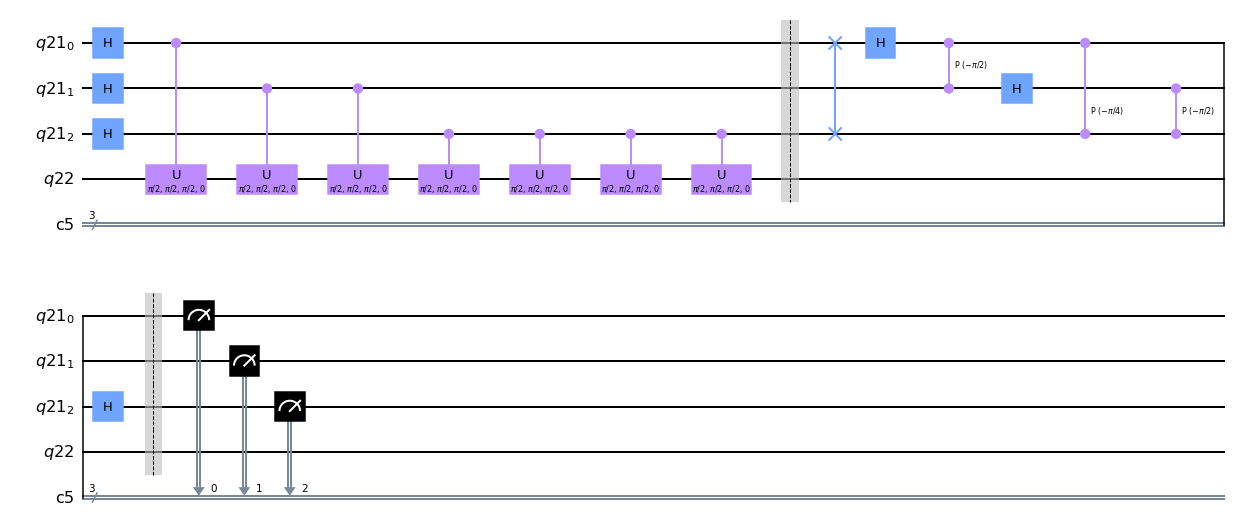

In [16]:
n=3
q_ctrl=QuantumRegister(n)
q_trg=QuantumRegister(1)
cr=ClassicalRegister(n)
qc=QuantumCircuit(q_ctrl, q_trg, cr)

phase_est(qc, q_ctrl, q_trg, pi/2, pi/2, pi/2)

qc.measure(q_ctrl, cr)
qc.draw(output='mpl')